## Stage 1: Install dependencies and setting up GPU environment

In [1]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [2]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  35035      0 --:--:-- --:--:-- --:--:-- 35035
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://deve

In [3]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.1 [223 MB]
Fetched 223 MB in 3s (79.2 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.1_all.deb ...
Unpacking tensorflow-model-server (2.4.1) ...
Setting up tensorflow-model-server (2.4.1) ...


## Check Python Version

In [4]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major is 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

## Stage 2: Import project dependencies

In [5]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4MB 18.9MB/s 
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.26.0 which is incompatible.
TensorFlow version: 2.4.1


## Stage 3: Dataset preprocessing



In [6]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### Image normalization

In [7]:
# scale the values to 0.0 to 1.0
X_train = X_train / 255.0
X_test = X_test / 255.0

### Objects Labels

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
print('\ntrain_images.shape: {}, of {}'.format(X_train.shape, X_train.dtype))
print('test_images.shape: {}, of {}'.format(X_test.shape, X_test.dtype))


train_images.shape: (50000, 32, 32, 3), of float64
test_images.shape: (10000, 32, 32, 3), of float64


## Stage 4: Defining the model

NOTE: We are using the model from the Section for Convolutional neural networks

In [10]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(32, 32, 3), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, name='Dense')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 15, 15, 8)         224       
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
Dense (Dense)                (None, 10)                18010     
Total params: 18,234
Trainable params: 18,234
Non-trainable params: 0
_________________________________________________________________


In [12]:
testing = False
epochs = 5

### Compiling the model and training model

In [14]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(X_train, y_train, epochs=epochs)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy: {}'.format(test_acc))

Epoch 1/5
1563/1563 [==============================] - 36s 2ms/step - loss: 1.8497 - sparse_categorical_accuracy: 0.3461
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4648 - sparse_categorical_accuracy: 0.4920
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3513 - sparse_categorical_accuracy: 0.5303
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3020 - sparse_categorical_accuracy: 0.5453
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.3394 - sparse_categorical_accuracy: 0.5296

Test accuracy: 0.5296000242233276


## Stage 5: Saving the model for production and setting up the path

In [15]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 88
drwxr-xr-x 2 root root  4096 Apr 10 10:23 assets
-rw-r--r-- 1 root root 78122 Apr 10 10:23 saved_model.pb
drwxr-xr-x 2 root root  4096 Apr 10 10:23 variables


> Displaying the model

In [16]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 32, 32, 3)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Dense'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0410 10:23:48.412285 140407470249856 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/

## Stage 6: Setting up the production environment
### Exporting the MODEL_DIR to environment variables

In [17]:
os.environ["MODEL_DIR"] = MODEL_DIR

### Running the TensorFlow Serving REST API

In [18]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [19]:
!tail server.log

2021-04-10 10:23:56.023098: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-04-10 10:23:56.023653: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-04-10 10:23:56.043716: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /tmp/1
2021-04-10 10:23:56.046626: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 39566 microseconds.
2021-04-10 10:23:56.047032: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2021-04-10 10:23:56.047132: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2021-04-10 10:23:56.048049: I tensorflow_serving/model_servers/server.cc:371] 

### Displaaying random images

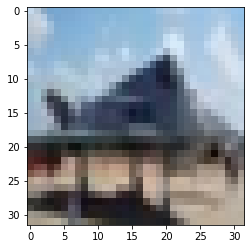

In [27]:
# def show(idx, title):
#   plt.figure()
#   plt.imshow(X_test[idx])
#   plt.axis('off')
#   plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0, len(X_test))
# show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))

plt.imshow(X_test[rando]);

## Stage 7: Creating the first POST request
### Creating the JSON data object

In [29]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 6862, 0.03137254901960784, 0.027450980392156862]]]]}


### Sending the first POST request to the model

In [32]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

# show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#   class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[y_test[0]], test_labels[0]))

In [34]:
predictions

[[-2.63795424,
  -7.86691475,
  -1.92172074,
  1.88597751,
  -2.67719984,
  0.58625555,
  -2.31681657,
  -4.36156464,
  -2.63057113,
  -7.73886919],
 [0.137636021,
  1.83395708,
  -3.67289805,
  -4.73360348,
  -6.4038744,
  -7.57061195,
  -5.93016338,
  -8.92909241,
  2.2076509,
  2.50924635],
 [0.997228861,
  -0.26692906,
  -2.45301867,
  -2.55533242,
  -4.46154,
  -3.28011942,
  -5.84520864,
  -3.93911529,
  1.22999501,
  -0.245928138]]

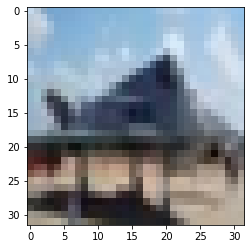

In [36]:
plt.imshow(X_test[rando])

In [37]:
class_names[np.argmax(predictions[0])]

'cat'

## Stage 8: Sending the POST request to a specific model

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

In [58]:
json_response

<Response [200]>

In [44]:
class_names[np.argmax(predictions[i])]

'cat'

In [45]:
np.argmax(predictions[i])

3

In [46]:
y_test[i]

array([3], dtype=uint8)